# Load Model

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

In [3]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [4]:
#od.download("https://www.kaggle.com/tawsifurrahman/tuberculosis-tb-chest-xray-dataset")

In [5]:
import os
base_dataset = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'
class_dir = ['Normal','Tuberculosis']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".png"):
        os.remove(os.path.join(cur_dir, item))

In [6]:
dataset_awal ='C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database'


print('Number of classes: {}'.format(len(os.listdir(dataset_awal))))

print('')

normal = len(os.listdir(dataset_awal+'/Normal'))
tbc= len(os.listdir(dataset_awal+'/Tuberculosis'))

print("DATASET AWAL ")
print('Normal : ', normal)
print('TBC : ', tbc)

Number of classes: 2

DATASET AWAL 
Normal :  3500
TBC :  700


In [7]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/TB_Chest_Radiography_Database"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [8]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/tuberculosis-tb-chest-xray-dataset/DatasetFixed'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

train_normal_dir = os.path.join(train_dir, 'Normal')
train_tuber_dir = os.path.join(train_dir, 'Tuberculosis')

validation_normal_dir = os.path.join(validation_dir, 'Normal')
validation_tuber_dir = os.path.join(validation_dir, 'Tuberculosis')

test_normal_dir = os.path.join(test_dir, 'Normal')
test_tuber_dir = os.path.join(test_dir, 'Tuberculosis')

In [9]:
print('Jumlah data train normal :', len(os.listdir(train_normal_dir)))
print('Jumlah data train tuber :',len(os.listdir(train_tuber_dir)))
print()
print('Jumlah data validation normal  :',len(os.listdir(validation_normal_dir)))
print('Jumlah data validation tuber :',len(os.listdir(validation_tuber_dir)))
print('')
print('Jumlah data test normal  :',len(os.listdir(test_normal_dir)))
print('Jumlah data test puber :',len(os.listdir(test_tuber_dir)))

Jumlah data train normal : 2800
Jumlah data train tuber : 560

Jumlah data validation normal  : 350
Jumlah data validation tuber : 70

Jumlah data test normal  : 350
Jumlah data test puber : 70


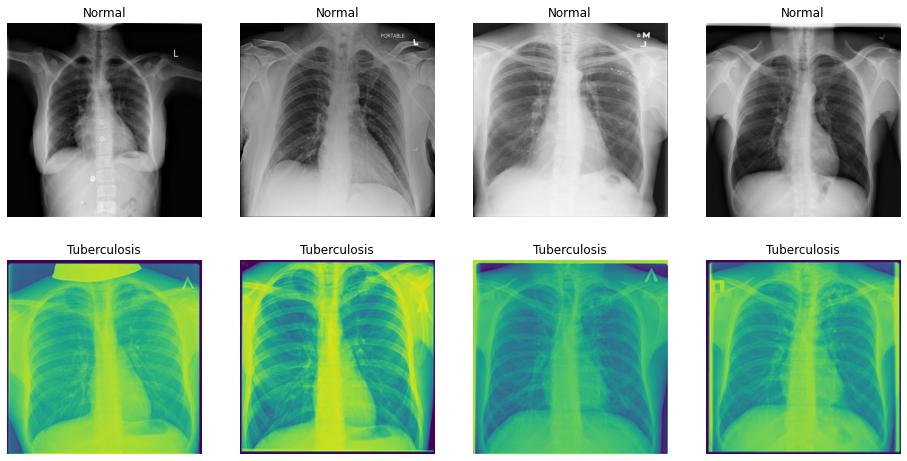

In [10]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches( ncols * 4,nrows * 4)

pic_index += 8
normal_img = [os.path.join(train_normal_dir, fname) 
                for fname in os.listdir(train_normal_dir)[pic_index-4:pic_index]]
tuberculosis_img  = [os.path.join(train_tuber_dir, fname) 
                for fname in os.listdir(train_tuber_dir)[pic_index-4:pic_index]]

for i, img_path in enumerate(normal_img+tuberculosis_img):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.title(img_path.split(os.path.sep)[-2])

plt.show()

# Gathering Data

In [11]:
'''!pip3 install opencv-python
import cv2
import numpy as np'''

'!pip3 install opencv-python\nimport cv2\nimport numpy as np'

In [12]:
#Gathering Data for Train
import cv2
import numpy as np

train_data = []
train_label = []

for r, d ,f in os.walk(train_dir):
  for file in f:
    if ".png" in file:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (100,100))
      train_data.append(image)S

      label = imagePath.split(os.path.sep)[-2]
      train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [13]:
#Gathering Data for Validation

test_data = []
test_label = []

for r, d ,f in os.walk(test_dir):
  for file in f:
    if ".png" in file:
      imagePath = os.path.join(r, file)
      image = cv2.imread(imagePath)
      image = cv2.resize(image, (100,100))
      test_data.append(image)

      label = imagePath.split(os.path.sep)[-2]
      test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [14]:
# Tampilkan shape dari data train dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Tse Label = ", test_label.shape)

Train Data =  (3360, 100, 100, 3)
Train Label =  (3360,)
Test Data =  (420, 100, 100, 3)
Tse Label =  (420,)


# Normalization

In [15]:
#Normalization dataset
print('Data sebelum di normalisasi :', train_data[0][0][0])
x_train = train_data.astype('float32')/255.0
x_test = test_data.astype('float32')/255.0
print('Data setelah di normalisasi :', x_train[0][0][0])

Data sebelum di normalisasi : [223 223 223]
Data setelah di normalisasi : [0.8745098 0.8745098 0.8745098]


# Labelling Encoder

In [16]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label sebelum di-encoder ", train_label[:5])
print("Label setelah di-encoder ", y_train[:5])
print()
print("Label sebelum di-encoder ", train_label[3000:3005])
print("Label setelah di-encoder ", y_train[3000:3005])

Label sebelum di-encoder  ['Normal' 'Normal' 'Normal' 'Normal' 'Normal']
Label setelah di-encoder  [0 0 0 0 0]

Label sebelum di-encoder  ['Tuberculosis' 'Tuberculosis' 'Tuberculosis' 'Tuberculosis'
 'Tuberculosis']
Label setelah di-encoder  [1 1 1 1 1]


# Modelling

In [17]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Dense, Conv2D,MaxPool2D, MaxPooling2D, GlobalMaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [18]:
img_input = layers.Input(shape = (100,100,3))
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3) ,activation='elu',strides=1, padding='same', input_shape = (100,100,3)),
  
    tf.keras.layers.Conv2D(64, (3,3) ,activation='elu',strides=1, padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3) ,activation='elu',strides=1, padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3) ,activation='elu',strides=1, padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.GlobalMaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='elu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),   
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0

In [19]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.001,decay=0.001/32),
              loss='binary_crossentropy',
              metrics='acc')


In [20]:
#history1 = model.fit(x_train, y_train, batch_size=20, epochs=100, validation_data=(x_test, y_test))

In [21]:
H = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
105/105 [==============================] - 331s 3s/step - loss: 0.7295 - acc: 0.5737 - val_loss: 0.6823 - val_acc: 0.8214
Epoch 2/100
105/105 [==============================] - 292s 3s/step - loss: 0.5726 - acc: 0.6859 - val_loss: 0.6505 - val_acc: 0.9048
Epoch 3/100
105/105 [==============================] - 295s 3s/step - loss: 0.4642 - acc: 0.7917 - val_loss: 0.5915 - val_acc: 0.9238
Epoch 4/100
105/105 [==============================] - 294s 3s/step - loss: 0.3867 - acc: 0.8529 - val_loss: 0.5579 - val_acc: 0.8714
Epoch 5/100
105/105 [==============================] - 295s 3s/step - loss: 0.2986 - acc: 0.9053 - val_loss: 0.3013 - val_acc: 0.9262
Epoch 6/100
105/105 [==============================] - 293s 3s/step - loss: 0.2665 - acc: 0.9085 - val_loss: 0.4392 - val_acc: 0.8810
Epoch 7/100
105/105 [==============================] - 293s 3s/step - loss: 0.2729 - acc: 0.8963 - val_loss: 0.2796 - val_acc: 0.9548
Epoch 8/100
105/105 [==============================] - 298s 3s

Epoch 62/100
105/105 [==============================] - 299s 3s/step - loss: 0.1007 - acc: 0.9693 - val_loss: 0.1418 - val_acc: 0.9714
Epoch 63/100
105/105 [==============================] - 298s 3s/step - loss: 0.0851 - acc: 0.9741 - val_loss: 0.1916 - val_acc: 0.9500
Epoch 64/100
105/105 [==============================] - 299s 3s/step - loss: 0.0706 - acc: 0.9801 - val_loss: 0.3395 - val_acc: 0.8405
Epoch 65/100
105/105 [==============================] - 301s 3s/step - loss: 0.0903 - acc: 0.9760 - val_loss: 0.2067 - val_acc: 0.9429
Epoch 66/100
105/105 [==============================] - 298s 3s/step - loss: 0.0932 - acc: 0.9677 - val_loss: 0.2029 - val_acc: 0.9429
Epoch 67/100
105/105 [==============================] - 298s 3s/step - loss: 0.0740 - acc: 0.9781 - val_loss: 0.1725 - val_acc: 0.9595
Epoch 68/100
105/105 [==============================] - 298s 3s/step - loss: 0.0742 - acc: 0.9781 - val_loss: 0.3241 - val_acc: 0.8690
Epoch 69/100
105/105 [==============================] -

# Plotting

In [22]:
!pip3 install numpy
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import cv2

In [23]:
import json
from tensorflow.keras.models import load_model
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/Model Dasar/Model2.h5')

In [24]:
from tensorflow.keras.models import load_model

# load model pertama
target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Skripsi/Model_Skripsi/Model Dasar'
model_kedua = load_model(target_dir + '/Model2.h5')


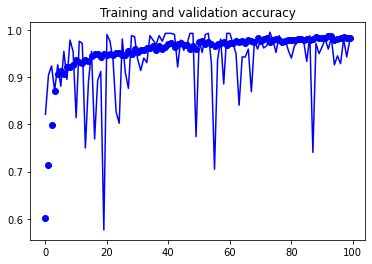

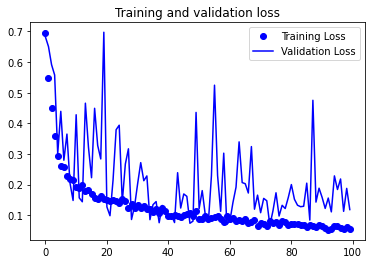

In [25]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [26]:
#Classification Report
from sklearn.metrics import classification_report

pred = model_kedua.predict(x_test)
labels = (pred > 0.5).astype(np.int)

print('Model Kedua')
print(classification_report(y_test, labels))

Model Kedua
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       350
           1       0.90      0.99      0.94        70

    accuracy                           0.98       420
   macro avg       0.95      0.98      0.96       420
weighted avg       0.98      0.98      0.98       420



In [27]:
y_pred = model_kedua.predict(x_test)

y_pred

array([[0.10540935],
       [0.26064798],
       [0.00571406],
       [0.47249925],
       [0.04207772],
       [0.01599005],
       [0.11981905],
       [0.01191777],
       [0.03674665],
       [0.02215615],
       [0.0235365 ],
       [0.15720522],
       [0.02300745],
       [0.00866368],
       [0.41219908],
       [0.06606081],
       [0.18260941],
       [0.00892738],
       [0.04140046],
       [0.05940238],
       [0.03551599],
       [0.01443276],
       [0.02461386],
       [0.00872436],
       [0.0366227 ],
       [0.22405511],
       [0.34020674],
       [0.0871751 ],
       [0.0526526 ],
       [0.04302549],
       [0.43493798],
       [0.01193839],
       [0.09858701],
       [0.19880185],
       [0.16557017],
       [0.04962605],
       [0.066351  ],
       [0.22617581],
       [0.05405009],
       [0.04154009],
       [0.02010012],
       [0.09606093],
       [0.28813717],
       [0.03845099],
       [0.02045885],
       [0.02776584],
       [0.04327804],
       [0.138

In [28]:
y_pred = model.predict(x_test)
new_pred = (y_pred > 0.5).astype(np.int)

new_pred

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [29]:
#Yang salah
"""from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, new_pred) #->dua duanya hasil prediksi

print(cf_matrix)"""

'from sklearn.metrics import confusion_matrix\n\n#Generate the confusion matrix\ncf_matrix = confusion_matrix(y_test, new_pred) #->dua duanya hasil prediksi\n\nprint(cf_matrix)'

In [30]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, labels)

print(cf_matrix)

[[342   8]
 [  1  69]]


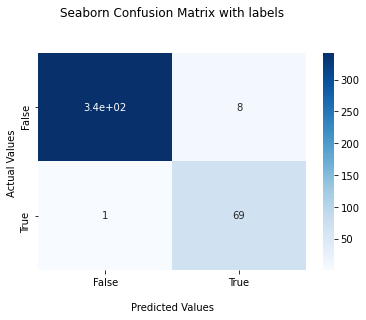

In [31]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

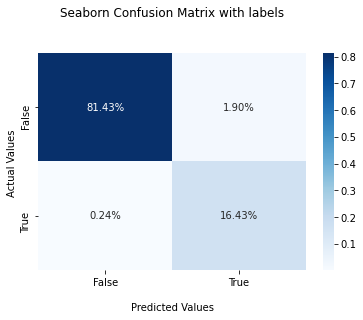

In [32]:
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()